# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [32]:
# Code Here
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import palmerpenguins as penguins

penguins = penguins.load_penguins()
penguins = penguins.dropna()

#dummifying
penguins = pd.get_dummies(penguins, columns=['island', 'sex'], drop_first=True, dtype=int)

#encoding species variable (Adelie = 0, Gentoo = 2, Chinstrap = 1)
label_encoder = LabelEncoder()
penguins['species'] = label_encoder.fit_transform(penguins['species'])


In [37]:
X = penguins.drop(columns=['species'])
y = penguins['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# kNN model with k=3
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train_scaled, y_train)
y_pred_knn1 = knn1.predict(X_test_scaled)

# kNN model with k=7
knn2 = KNeighborsClassifier(n_neighbors=7)
knn2.fit(X_train_scaled, y_train)
y_pred_knn2 = knn2.predict(X_test_scaled)

In [38]:
# Decision Tree with max depth of 3
tree1 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree1.fit(X_train, y_train)
y_pred_tree1 = tree1.predict(X_test)

# Decision Tree with max depth of 5
tree2 = DecisionTreeClassifier(max_depth=5, random_state=42)
tree2.fit(X_train, y_train)
y_pred_tree2 = tree2.predict(X_test)

In [46]:
# evaluating knn model 1
print("KNN Model 1")

y_pred_knn1 = knn1.predict(X_test_scaled)
y_prob_knn1 = knn1.predict_proba(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_knn1)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred_knn1)
print("\nOverall Accuracy:", accuracy)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn1, average=None)
print("\nPer-Class Precision:", precision)
print("Per-Class Recall:", recall)
print("Per-Class F1-Score:", f1)

roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob_knn1, multi_class='ovr')
print("\nROC AUC Score:", roc_auc)

# evaluating knn model 2
print("------------")
print("KNN Model 2")

y_pred_knn2 = knn2.predict(X_test_scaled)
y_prob_knn2 = knn2.predict_proba(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_knn2)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred_knn2)
print("\nOverall Accuracy:", accuracy)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_knn2, average=None)
print("\nPer-Class Precision:", precision)
print("Per-Class Recall:", recall)
print("Per-Class F1-Score:", f1)

roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob_knn2, multi_class='ovr')
print("\nROC AUC Score:", roc_auc)

KNN Model 1
Confusion Matrix:
[[36  1  0]
 [ 1 16  0]
 [ 0  0 30]]

Overall Accuracy: 0.9761904761904762

Per-Class Precision: [0.97297297 0.94117647 1.        ]
Per-Class Recall: [0.97297297 0.94117647 1.        ]
Per-Class F1-Score: [0.97297297 0.94117647 1.        ]

ROC AUC Score: 0.9995156645820722
------------
KNN Model 2
Confusion Matrix:
[[37  0  0]
 [ 0 17  0]
 [ 0  0 30]]

Overall Accuracy: 1.0

Per-Class Precision: [1. 1. 1.]
Per-Class Recall: [1. 1. 1.]
Per-Class F1-Score: [1. 1. 1.]

ROC AUC Score: 1.0


In [49]:
# evaluating decision tree model 1

print("Tree Model 1")

y_pred_tree1 = tree1.predict(X_test)
y_prob_tree1 = tree1.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred_tree1)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred_tree1)
print("\nOverall Accuracy:", accuracy)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_tree1, average=None)
print("\nPer-Class Precision:", precision)
print("Per-Class Recall:", recall)
print("Per-Class F1-Score:", f1)

roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob_tree1, multi_class='ovr')
print("\nROC AUC Score:", roc_auc)

# evaluating decision tree model 2
print("-------------")

print("Tree Model 2")

y_pred_tree2 = tree2.predict(X_test)
y_prob_tree2 = tree2.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred_tree2)
print("Confusion Matrix:")
print(cm)

accuracy = accuracy_score(y_test, y_pred_tree2)
print("\nOverall Accuracy:", accuracy)

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_tree2, average=None)
print("\nPer-Class Precision:", precision)
print("Per-Class Recall:", recall)
print("Per-Class F1-Score:", f1)

roc_auc = roc_auc_score(pd.get_dummies(y_test), y_prob_tree2, multi_class='ovr')
print("\nROC AUC Score:", roc_auc)


Tree Model 1
Confusion Matrix:
[[37  0  0]
 [ 1 16  0]
 [ 2  0 28]]

Overall Accuracy: 0.9642857142857143

Per-Class Precision: [0.925 1.    1.   ]
Per-Class Recall: [1.         0.94117647 0.93333333]
Per-Class F1-Score: [0.96103896 0.96969697 0.96551724]

ROC AUC Score: 0.9741696696416215
-------------
Tree Model 2
Confusion Matrix:
[[34  3  0]
 [ 0 17  0]
 [ 2  0 28]]

Overall Accuracy: 0.9404761904761905

Per-Class Precision: [0.94444444 0.85       1.        ]
Per-Class Recall: [0.91891892 1.         0.93333333]
Per-Class F1-Score: [0.93150685 0.91891892 0.96551724]

ROC AUC Score: 0.9608204902266508


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.


Overall AUC: 1.0


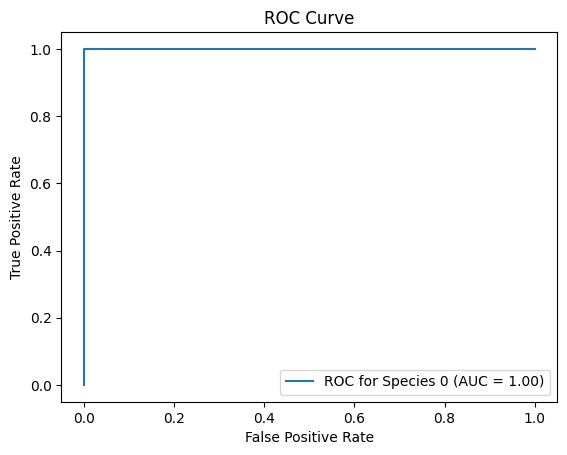

In [54]:
auc = roc_auc_score(y_test, y_prob_knn2, multi_class='ovr')
print("\nOverall AUC:", auc)

species_index = 0  # Choose the species for which to plot ROC
fpr, tpr, _ = roc_curve(y_test == species_index, y_prob_knn2[:, species_index])

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC for Species {species_index} (AUC = {auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()